In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
df = df.drop(['Name'], axis = 1)
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


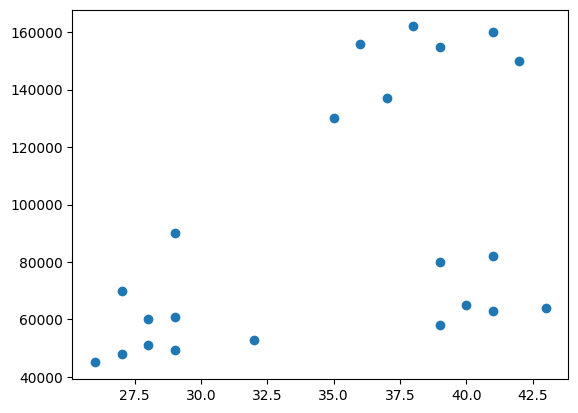

In [6]:
plt.scatter(df['Age'], df['Income($)'])

In [16]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [17]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [18]:
df['cluster'] = y_predicted


,Age,Income($),clutter,cluster
0,27,70000,0,2
1,29,90000,2,0
2,29,61000,0,2
3,28,60000,0,2
4,42,150000,1,1
5,39,155000,1,1
6,41,160000,1,1
7,38,162000,1,1
8,36,156000,1,1
9,35,130000,1,1


In [19]:
df = df.drop(['clutter'], axis = 1)
df

,Age,Income($),cluster
0,27,70000,2
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


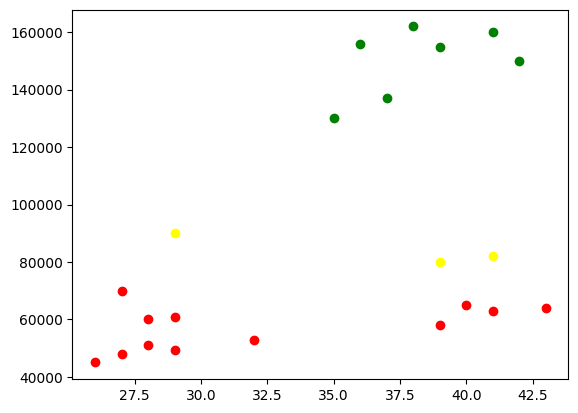

In [20]:
df1 = df[df.cluster == 1]
df0 = df[df.cluster == 0]
df2 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df0.Age, df0['Income($)'], color = 'yellow')



In [25]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,0
2,0.176471,0.136752,2
3,0.117647,0.128205,2
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [26]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [27]:
df['cluster'] = y_predicted
df

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


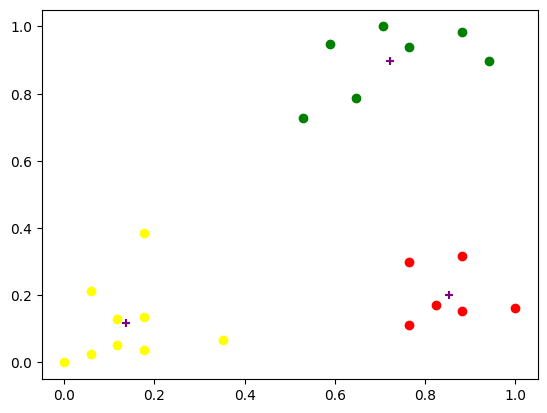

In [29]:
df1 = df[df.cluster == 1]
df0 = df[df.cluster == 0]
df2 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df0.Age, df0['Income($)'], color = 'yellow')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker = '+', label = 'centroid')

In [30]:
k_r = range(1,10)
sse = []
for k in k_r:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [31]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3625079900797327,
 0.2963623258321303,
 0.26140103788955565,
 0.17355596555312636,
 0.1433332781445933,
 0.12331136674029941]

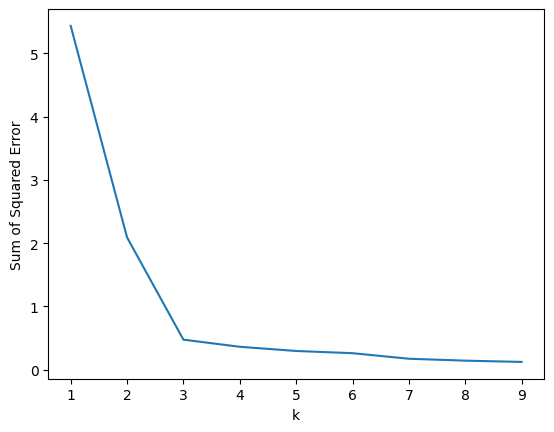

In [32]:
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.plot(k_r, sse)